# Mushroom Classification

# Abstract

In the food industry, it is essential to know if a mushroom is safe to consume (edible) or not (poisonous).

A machine learning algorithm will assess whether a mushroom is a safe food or a lethal toxin by following seven steps.

Logistic Regression has been selected as the model to use moving forward in order to complete our classification task. That's due to our problem, where the value of our target variable has a binary output, either belongs to one class (edible) or another (poisonous).

An accuracy score of about 97% was achieved using a splitting strategy like K-fold Cross-Validation and an optimizer like GridSearchCV.

A different method for achieving a score of 100% was demonstrated, along with an explanation of when label encoding should be preferred to one hot encoding.

# Objectives

* Discover where to obtain and gather open-sourced datasets so that we may begin building a machine learning model
* Gain knowledge of how crucial data preparation is to the machine learning process
* Find out how to feed the preprocessed data into a machine learning algorithm and assess the model using metrics like accuracy score and confusion matrix
* Learn how to measure a model's stability with respect to constantly changing training and test data by using an alternative splitting approach to the conventional one, the holdout method
* Tune a model's parameters using a method that finds the optimal parameter values from the supplied grid of parameters in order to improve a model's performance
* Understand the difference between label encoding and one hot encoding

# What sets my tutorial apart from other comparable online tutorials

Apart from thoroughly explaining why each part is used, even if most tutorials do not do; I needed to find something that would make my tutorial stand out.
<br>
<br>
I noticed that no single tutorial shows the results of using a Label Encoder and One Hot Encoding for classifying a mushroom at once. It's either only the one, or the other, or a combination of the two but never all the cases together.
<br>
<br>
In light of the fact that doing so might actually hasten a person's cognitive growth, I decided that compiling all relevant resources into a comprehensive tutorial would be the best course of action.
<br>
<br>
<br>
It all started by accidentally seeing this [100% Accurate Mushroom Classification in Python](https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace) article on Medium which uses the same dataset we will be using, an accuracy score of 100% was attained, whereas I could only achieve an approximate score of 97% even after using parameter tuning techniques. 
<br>
<br>
After wrapping my head around and going through all the steps that the article's author went, I realised that One Hot Encoding was used, whereas I was trying to encode my categorical data with Label Encoding.
<br>
<br>
This [Mushroom Labelling](https://mrtjwhipple.medium.com/mushroom-labelling-db941388f0d0) article on Medium and [Training a machine to determine whether a mushroom is edible](https://inmachineswetrust.com/posts/mushroom-classification/) article on "In Machines We Trust" website shed light on as to what was the reason.

## Summary of the approach
### The 7 Machine Learning stages are the following:
1. Collecting Data
2. Exploratory Data Analysis and Data Preprocessing
3. Choosing a model
4. Training the model
5. Evaluating the model
6. Parameter Tuning
7. Making Predictions

Let's delve into it to get a better understanding of what each stage really does.

### 1. Collecting Data

The most crucial phase of tackling any supervised machine learning issue is data collection. The most popular primary data gathering techniques include interviewing, observing, completing surveys and questionnaires, holding focus groups, recording oral histories, and web scraping.

We are fortunate, though, since Kaggle exists.

Kaggle is an online community for machine learning and data science aficionados. Users of Kaggle have the ability to work collaboratively, access and publish datasets, use notebooks with GPU integration, and compete with other data scientists to tackle data science issues [3].

That being said, adopting an open-sourced dataset from the UCI Machine Learning [2] that has been posted on Kaggle would significantly simplify our lives.

In [233]:
import warnings
warnings.filterwarnings("ignore")

In [234]:
%%capture

! pip install pandas
import pandas as pd

def get_df_from_file():
    missing_values = ["na", "?"]
    df = pd.read_csv('mushrooms.csv', na_values = missing_values)
    
    return df


df = get_df_from_file()

<u>Note:</u> The only reason we use functions for such simple tasks is because we will reuse the code at a later stage below.

<br>

### 2. Exploratory Data Analysis and Data Preprocessing

####  Understanding the data

In [235]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<br>
<br>

<img src="mushroom.jpg" width="500">

The image was taken from an [Analytics Vidhya's article](https://medium.com/analytics-vidhya/mushroom-classification-edible-or-poisonous-9327a56c6fc9) but colors were added to it via the [GIMP software](https://www.gimp.org/).
<br>
<br>

Based on the 10 features that are shown in the image above, our dataset has the following:
<br>
 - 3 features for Cap (shape, surface, color)
 - 4 features for Gill (attachment, spacing, size, color)
 - 6 features for Stalk (shape, root, surface above ring, surface below ring, color above ring, color below ring)
 - 2 features for Veil (type, color)
 - 2 features for Ring (number, type)
 - 1 feature for Spores (color)
 - 4 additional features (bruises, odor, population, habitat)
 - and our target variable/label, class

<br>
<br>
<br>

In [236]:
df.shape

(8124, 23)

Our dataset consists of 22 independent variables (features) and a dependent variable (label) that characterise a mushroom having 8124 instances (single rows of data). All these features contribute in defining (the label) whether a mushroom is poisonous or edible.
<br>
<br>
<br>

In [237]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

It is evident that every feature has a datatype of object, indicating that every feature contains categorical data.
<br>
<br>
<br>

In [238]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Normally, the function df.describe(include[object]) needs to be used in order to view the statistical summary of categorical data.
<br>
<br>
However, as there are no numerical data in our dataset, even when using df.describe(), a statistical summary of the categorical data will be shown.
<br>
<br>
<br>

In [239]:
df['class'].unique()

array(['p', 'e'], dtype=object)

It is clear that our target column "class" only contains the values "p" and "e", which stand for poisonous and edible, respectively.
<br>
<br>

#### Checking for missing data

In [240]:
df.isnull().values.any()

True

Missing data are present in our dataset.
<br>
<br>
<br>

In [241]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

The only variable that has missing data is the stalk-root.
<br>
<br>
<br>

In [242]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

The most frequent value is the value "b" which stands for bulbous; thus, we will utilise mode to replace the 2480 missing values with that letter.

In [243]:
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

If you're curious about how I know what it stands for, you can have a look at [mushroom.csv's "Detail" section](https://www.kaggle.com/datasets/uciml/mushroom-classification).

<br>
<br>

#### Visualising the data

Most frequently, histograms are used to visualise outliers in numerical data.
<br>
However, since we only have categorical data, count plots—which are histograms spanning categorical variables—must be employed.

In [244]:
%%capture

! pip install matplotlib
! pip install seaborn

from matplotlib import pyplot as plt
import seaborn as sns

<br>
<br>
<br>
This will allow us to examine how often each value appears throughout its corresponding variable in respect of our label, 'class'.

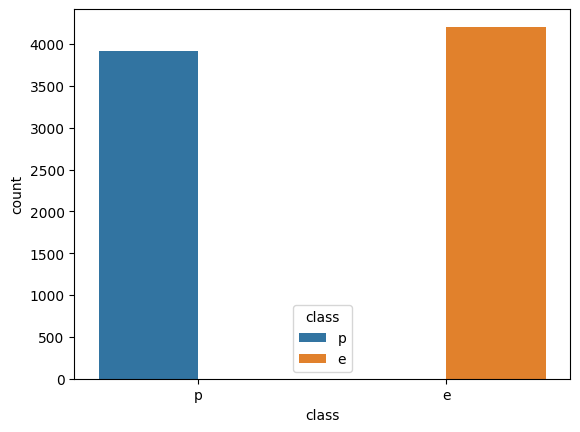

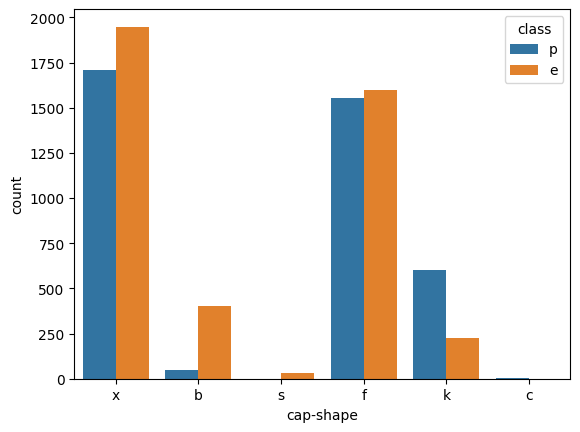

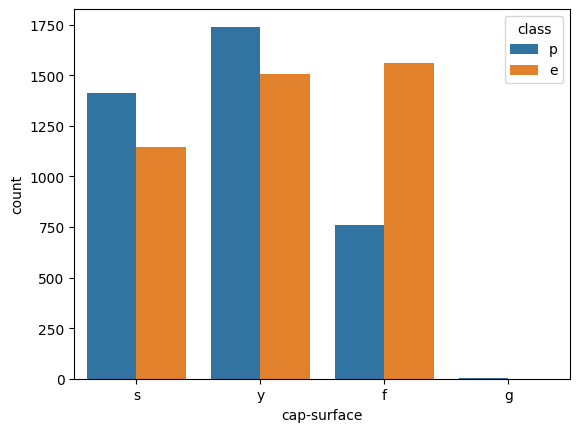

In [245]:
# create a countplot for every variable and color encode the value in respect of our label
for i, col in enumerate(df.columns):
    # create a figure for each variable of the dataset
    plt.figure(i)

    # plot the figure for the specific variable and its corresponding values by color encoding them
    sns_plot = sns.countplot(x=col, # variable 
                             hue='class', # color encoding based on our label
                             data=df # dataset
                            )
    
    if i == 2:
        break

<u>Note:</u> For convenience, just the countplots of the first three variables were displayed.

<br>
<br>

#### Checking if the dataset is balanced or imbalanced

In [246]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The first countplot above may have already led us to infer that the proportion of edible to deadly mushrooms is almost equal.
<br>
However, all scepticism will be dispelled by discovering the unique numerical values of the target variable.
<br>
As can be seen, the edible and poisonous mushrooms are equal to 4208 and 3916 respectively which are close. 
<br>
<br>
That being said, it can be concluded that the dataset is balanced.
<br>
<br>


#### Encoding the categorical variables

Machine learning models require all input and output variables to be numeric. 
<br>
Since all of our data is categorical, it must first be converted to numbers before we can fit and evaluate our model. 

In [247]:
%%capture

! pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

In [248]:
def encode_data(data):
    le = LabelEncoder()

    for col in data:
        df[col] = le.fit_transform(df[col])
        
    return df
      
    
df = encode_data(df.columns)

The data encoding technique employed is the label encoding where as its name suggests, it transforms the labels into a numeric form.
<br>
<br>
<br>

In [249]:
# check that all the encoded values are different between them
print(df['population'].unique())

# check the size of the encoded values of the label 'class'
print(df.groupby('class').size()) # 0 and 1

[3 2 0 4 5 1]
class
0    4208
1    3916
dtype: int64


We must ensure that the encoded values are all distinct from one another.
<br>
<br>
The fact that the encoded values have the same quantity as the uncoded values further demonstrates the success of the label encoding (4208, 3916). Thus, it follows that the numbers 0 and 1 correspond to edible and poisonous mushrooms, respectively.
<br>
<br>

#### Splitting data

<u> The difference between the Train set and Test set: </u>
<br>
Our data is frequently divided into training and test sets when we are building a machine learning model utilising certain data. The model is trained using the training set, then it is tested with data that it has never seen before.
<br>
<br>

First, let's demonstrate how we divide the dataset's features and label.

In [250]:
features = df.iloc[:, 1:] # all rows, all the features and no label

features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [251]:
target = df.iloc[:, 0] # all rows, label only

target.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

<br>
<br>
<br>
To ensure that the forms are in line to have a correct fit while training, it is necessary to examine the sizes of both the features and the target.
<br>
Otherwise, the process of learning could be disrupted by different shapes.

In [252]:
print("Shape of features is ", features.shape)
print("Shape of target is ", target.shape)

Shape of features is  (8124, 22)
Shape of target is  (8124,)


<u> As expected, we have: </u>
 - only one target (class)
 - 21 features (22 (features) - 1 (a feature has been dropped) = 21)
 - 8124 instances for both features and target

<br>

In [253]:
from sklearn.model_selection import train_test_split

# train set and test set
def split_data(features, target):
    train_features, test_features, train_target, test_target = \
                                    train_test_split(features, target, test_size=0.2, random_state=42)
    
    return train_features, test_features, train_target, test_target


train_features, test_features, train_target, test_target = split_data(features, target)

The distinction between the train and test set was already covered above.
<br>
<br>
A common split when using the hold-out approach employs 80% of the data for training and 20% for testing.
<br>
<br>
<br>

In [254]:
print("Shape of features in the train set: ", train_features.shape)
print("Shape of target in the train set: ", train_target.shape)
print("Shape of features in the test set: ", test_features.shape)
print("Shape of target in the test set: ", test_target.shape)

Shape of features in the train set:  (6499, 22)
Shape of target in the train set:  (6499,)
Shape of features in the test set:  (1625, 22)
Shape of target in the test set:  (1625,)


<u> By doing</u>: 8124 (instances) * 80/100 (proportion of train set) = 6499.2 ~ 6499 (instances) which verifies our train set's size.
<br>
<br>
<u> Same applies for test set</u>:
<br>
8124 (instances) * 20/100 (proportion of test set) = 1624.8 ~ 1625 (instances) which verifies our test set's size.

<br>
<br>

#### Feature Scaling

In [255]:
from sklearn.preprocessing import StandardScaler

def standardise_data(train_features, test_features):
    sc = StandardScaler()

    train_features = sc.fit_transform(train_features)
    test_features = sc.transform(test_features)
    
    return train_features, test_features


train_features, test_features = standardise_data(train_features, test_features)

Our data needs to be transformed in such a manner to have a mean of 0 and a standard deviation of 1. That’s where Standard Scaler comes into play. 
<br>
The purpose of doing such a thing is to make sure that the data is internally consistent.
<br>
<br>

### 3. Choosing a model

We have finally come to the point where a model needs to be chosen for both training and evaluating it. 
<br>
Our chosen model is Logistic Regression as it is easy to be built and be trained.

In [256]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

<br>


### 4. Training the model

In [257]:
# fit Logistic Regression
model.fit(train_features, train_target)

LogisticRegression()

<br>

### 5. Evaluating the model

For evaluating our Logistic Regression model, accuracy score needs to be found and
confusion matrix needs to be plotted.

In [258]:
# get the prediction of the target of the test set
test_target_prediction = model.predict(test_features) # predict class labels for samples in features of test set

In [259]:
from sklearn.metrics import accuracy_score

print("Accuracy score:", accuracy_score(test_target, test_target_prediction, normalize=True) * 100)

Accuracy score: 96.43076923076923


Our model has almost attained an accuracy of 97%, which is regarded fantastic.
<br>
Although working on a classification task, the optimum score is 100% accuracy.
<br>
As a result, we'll strive to enhance it even more using a tool called an optimizer in a later stage.
<br>
<br>
<br>

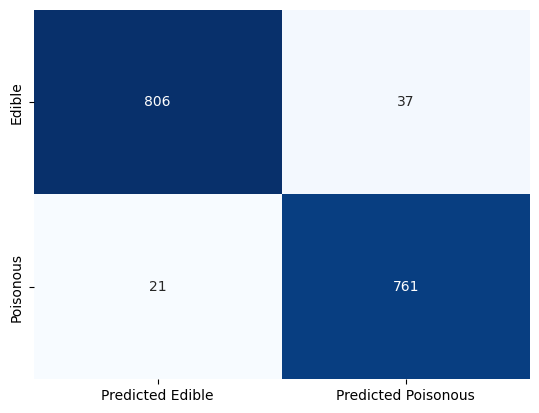

In [260]:
from sklearn.metrics import confusion_matrix

def visualise_conf_matrix(test_target, test_target_prediction):
    # confusion matrix
    cm = confusion_matrix(test_target, test_target_prediction)

    sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'], \
                xticklabels=['Predicted Edible', 'Predicted Poisonous'])

    plt.show()
    

visualise_conf_matrix(test_target, test_target_prediction)

The confusion matrix reveals that the model has correctly predicted 1567 out of 1625 observations, which is a decent result.
<br>
<br>

### 6. Parameter Tuning

This stage aims to prevent over-fitting, which occurs when a model performs well on training data but poorly on unseen data, by improving how effectively it learns the data that is given into it (generalisation). 
<br>
<br>
That's where Cross-validation enters the picture.
<br>
<br>

#### Cross-validation using KFold

Cross-validation is very similar to hold-out method, but it’s applied to more subsets. For example, what if one subset of our data has only mushrooms from a specific cap, gill or only
mushrooms with the same stalk? Such a case would definitely lead to over-fitting but the goal is to avoid it.


<u> The difference between Hold-out method and K-fold Cross Validation: </u> 
<br>
During cross-validation, we do many splits, not just one like how the Hold-out method does. We are able to divide our data into 3, 5, 10, or any K number of splits/folds.

The data set is divided into five parts if we utilise 5-folds. A different part turns into the validation set in every iteration.
<br>
<br>
In the first iteration, we use the first part of the data for validation. Then, as illustrated in the
image below, we use the other parts of the data set for training.

<img src="kfold.png" width="600">

The image was created using [draw.io](https://www.draw.io/connect/office365/index.html) but was inspired from [How to Implement K fold Cross-Validation in Scikit-Learn
](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/) article.

<br>
<br>
<br>
However, the most popular number used for folds is 10 [5] and thus, that's the number we will move forward with.

In [261]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=42, shuffle=True)

The model will then be finalised by averaging it against each of the folds.

In [262]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features, target, scoring="average_precision", cv=10)

print("Cross validation scores:", scores, "\n")
print("Average accuracy: {}".format(scores.mean() * 100))

Cross validation scores: [0.6400693  0.96198468 0.99918721 0.99969333 0.99512523 0.98409946
 1.         0.99695716 0.61063208 0.9946861 ] 

Average accuracy: 91.82434548897216


<br>

#### GridSearchCV

When fitting our model, we may test out all the possible combinations while specifying various values for each hyperparameter. 
<br>
GridSearchCV's outcome is a collection of hyperparameters that best suit our data in terms of the scoring metric we want our model to optimize on [6].
<br>
<br>

In [263]:
import numpy as np

# a dictionary of parameters
parameters = {
'penalty' : ['l1','l2'],   
'C'       : np.logspace(-3,3,7),
'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

The parameter grid (a dictionary containing all the various hyperparameters) used below was taken from a Medium article, [Tuning the Hyperparameters of your Machine Learning Model using GridSearchCV](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27).
<br>
<br>
<br>

In [264]:
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(model, # model
                    param_grid=parameters, # hyperparameters
                    scoring='accuracy', # metric for scoring
                    cv=10) # number of folds


# train the model with the training_model set
clf.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

<br>
<br>

GridSearchCV makes an effort to improve our score by adjusting the given parameters in order to identify the best ones.

In [265]:
print("Best tuned hyperparameters :", clf.best_params_, "\n")
print("Accuracy using GridSearchCV:", clf.best_score_ * 100)

Best tuned hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'} 

Accuracy using GridSearchCV: 96.75318241080953


<br>
<br>

### 7. Predictions

<b> Logistic Regression: </b> 96.43076923076923
<br>
<b> After using K-fold Cross-Validation and GridSearchCV: </b> 96.75318241080953

It is clear from comparing the two scores that using K-fold Cross-Validation along with GridSearchCV assisted us in improving the performance of our model.

## Alternative Solution - One Hot Encoding:

We might have attained a great score of almost 97% but we could easily achieve a score of 100% in such a task.
<br>
<br>
Let's see how this could have been done.
<br>
<br>

Accuracy score: 100.0


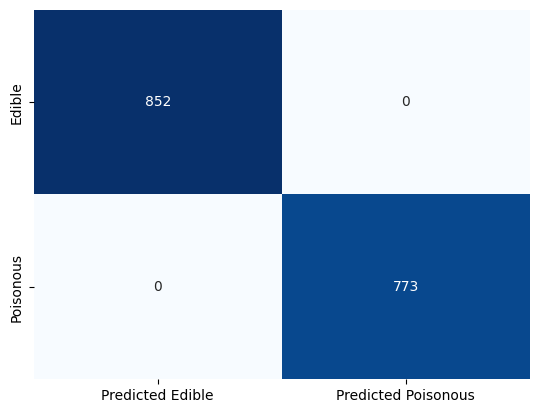

In [266]:
# load file and get it as a dataframe
df1 = get_df_from_file()

# replace missing values
df1['stalk-root'].fillna(df1['stalk-root'].mode()[0], inplace=True)

dummies_columns1 = [list(df1.columns)[i] for i in np.arange(1,23)]
df1 = pd.get_dummies(df1, columns=dummies_columns1)

# map target variable class: 1 = poisonous, 0 = edible
df1['class'] = df1['class'].map({"p": 1, "e": 0})

# split data
features = df1.iloc[:, 1:]
target = df1.iloc[:, 0]

# training set and test set
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=0)

# feature scaling
train_features, test_features = standardise_data(train_features, test_features)

# choose Logistic Regression as our model and fit it
model = LogisticRegression()
model.fit(train_features, train_target)

# get the prediction of the target of the test set
test_target_prediction = model.predict(test_features)

# print accuracy score
print("Accuracy score:", accuracy_score(test_target, test_target_prediction, normalize=True) * 100)

# visualise confusion matrix
visualise_conf_matrix(test_target, test_target_prediction)

The code seen above is from the Medium post, [100% Accurate Mushroom Classification in Python](https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace).
<br>

### What makes One Hot Encoding preferable than Label Encoding?

When the distinct values of each categorical feature are ordinal, label encoding is utilised. In other words, they can have some hierarchy or order. For instance, it makes reasonable to show T-shirt sizes as 1, 2, 3, and 4 since they might range from small to extra large.
<br>
<br>
That's not the case in our situation, though. Nominal categorical variables with no inherent order make up our features. Examples of possible colours for the cap-color feature are brown, buff, cinnamon, grey, punk, purple, red, white, and yellow. This tactic is absurd, though, because yellow doesn't have a value four times that of brown.
<br>
<br>
<br>
<br>
As can be seen on the code above, the data is one hot encoded by using the Pandas method "get dummies" to create dummy variables for all variables except from the "class" variable (our label). The label's values are manually mapped instead.
<br>
<br>
Now, someone could think of why was the author done the mapping manually to adjust the numbers since he could start at 0 rather than 1 to include the "class" label as well?

In [267]:
df2 = get_df_from_file()

df2['stalk-root'].fillna(df2['stalk-root'].mode()[0], inplace=True)

dummies_columns2 = [list(df2.columns)[i] for i in np.arange(0,23)]
df2 = pd.get_dummies(df2, columns=dummies_columns2)

df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


The explanation is that using One Hot Encoding on the target variable is a terrible practice. It allows more possible combinations, which greatly complicates our task. The columns only changed from 117 to 118 due to the fact that the target variable has only two possible values (from 'class' transformed into 'class_e' and 'class_p').

In [268]:
df1.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Explanation: [OneHotEncoding on target variable](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)

<br>
<br>
The correct answer to the above question is that the author maps the target variable as he can do so; but the suggested way to represent the label as an integer value of 0 or 1 is to use the LabelEncoder.
<br>

<u>Shown with code:</u> [Training a machine to determine whether a mushroom is edible](https://inmachineswetrust.com/posts/mushroom-classification/)
<br>
<br>
<u>Explanations:</u> 
1. [Why should LabelEncoder from sklearn be used only for the target variable?](https://stackoverflow.com/questions/62892086/why-should-labelencoder-from-sklearn-be-used-only-for-the-target-variable)
2. [Is it vital to do label encoding with target variable?](https://datascience.stackexchange.com/questions/110031/is-it-vital-to-do-label-encoding-with-target-variable)
<br>
<br>

## Sources:
[1] [Why Logistic Regression?](https://kambria.io/blog/logistic-regression-for-machine-learning/)
<br>
[2] [Mushroom Classification dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)
<br>
[3] [What is Kaggle?](https://www.datacamp.com/blog/what-is-kaggle)
<br>
[4] [80%-20% splitting strategy](https://medium.com/@karyaozmen/how-to-split-train-and-test-data-c1381d240fc4)
<br>
[5] [The reason why K equals to 10 is the most popular value used](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/#:~:text=The%20key%20configuration%20parameter%20for,evaluate%20models%20is%20k%3D10.)
<br>
[6] [The dictionary of hyperparameters used for tuning the hyperparameters using GridSearchCV](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)